In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
#Download a geojson of the region geometries
gdf = gpd.read_file(filename=r'https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_municipalities.geojson')
gdf = gdf.dissolve(by='reg_name') #The geojson is to detailed, dissolve boundaries by reg_name attribute
gdf = gdf.reset_index()

#gdf.reg_name[~gdf.reg_name.isin(regions)] Two regions are missing in your df
#16    Trentino-Alto Adige/Südtirol
#18    Valle d'Aosta/Vallée d'Aoste


In [3]:
CrossedRegionColor = "crimson"
NonCrossedRegionColor = "navy"
CityColor = "red"

In [42]:

regions_crossed = ['Lombardia', 'Emilia-Romagna', 'Toscana', 'Lazio']
regions_non_crossed = ['Trentino Alto Adige', "Valle d'Aosta", 'Veneto','Friuli-Venezia Giulia', 'Liguria', 'Piemonte', 'Marche', 'Umbria', 'Abruzzo', 'Sardegna', 'Puglia', 'Molise', 'Basilicata', 'Calabria', 'Sicilia', 'Campania']

df = pd.DataFrame([regions_crossed,[CrossedRegionColor  for i in range(len(regions_crossed))]]).transpose()
df2 = pd.DataFrame([regions_non_crossed,[NonCrossedRegionColor for i in range(len(regions_non_crossed))]]).transpose()
df3 = df.append(df2).reset_index(drop=True)
df3.columns = ['region','color']


In [43]:

gdf = pd.merge(left=gdf, right=df3, how='left', left_on='reg_name', right_on='region')


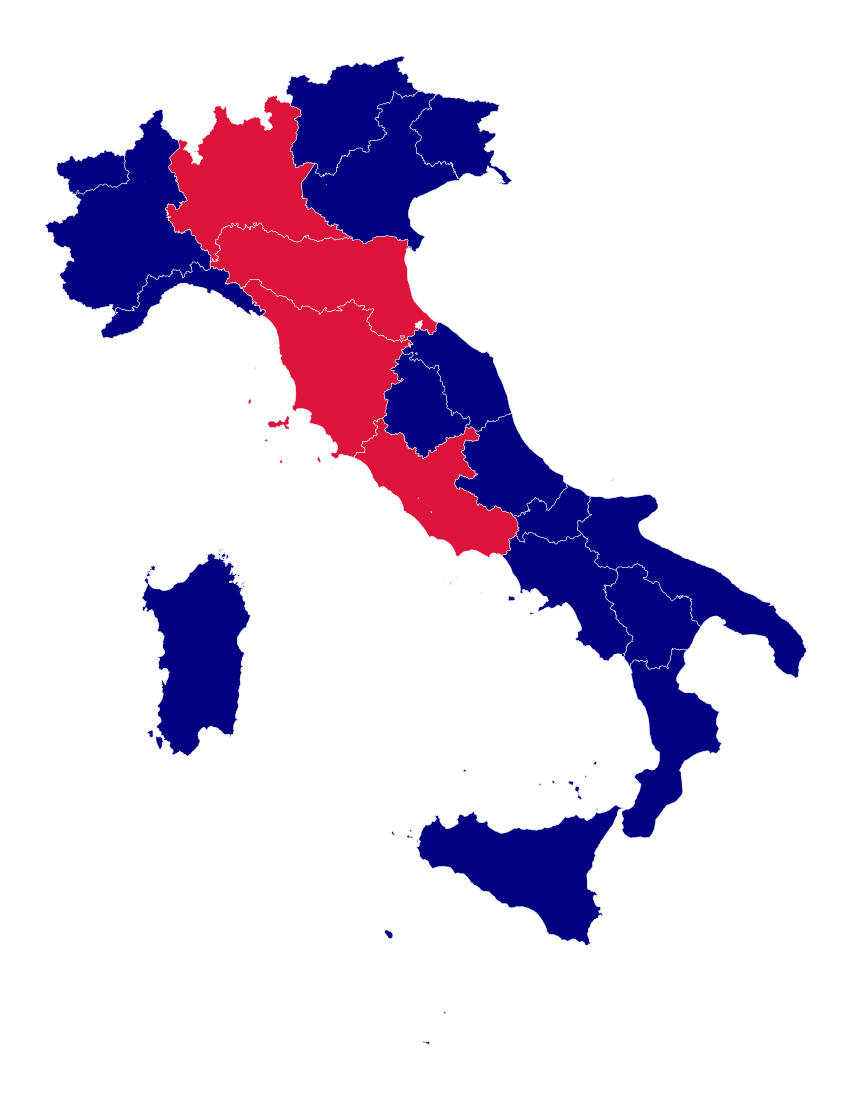

In [44]:
import seaborn as sns
gdf['color'] = gdf['color'].fillna(NonCrossedRegionColor)
ax = gdf.plot(
    edgecolor="white",
    linewidth=.5,
    figsize=(30, 20),
    color=gdf['color'],
    alpha= 1,
    missing_kwds={'color': NonCrossedRegionColor});


ax.set_axis_off();

In [45]:
# world cities I need
from shapely.geometry import Point
from geopandas import GeoDataFrame
Rome = {"Name" : "Rome", "geometry" : Point(12.4828,41.8931 )}
Milan = {"Name" : "Milan", "geometry" : Point(9.1900,45.4669)}
Bologna = {"Name" : "Bologna", "geometry" : Point(11.3428, 44.4939)}
Firenze = {"Name" : "Firenze", "geometry" : Point(11.2542, 43.7714)}
Piacenza = {"Name" : "Piacenza", "geometry" : Point(9.70462, 45.04202)}
Viterbo = {"Name" : "Viterbo", "geometry" : Point(12.10560, 42.41937)}
Modena = {"Name" : "Modena", "geometry" : Point( 10.92008, 44.64883)}
Parma = {"Name" : "Parma", "geometry" : Point( 10.3279, 44.801485)}
Montepulciano = {"Name" : "Montepulciano", "geometry" : Point( 11.777859, 43.091876)}
List = [Rome, Milan, Bologna, Firenze, Piacenza, Viterbo, Modena, Parma, Montepulciano]
cities = GeoDataFrame(List)


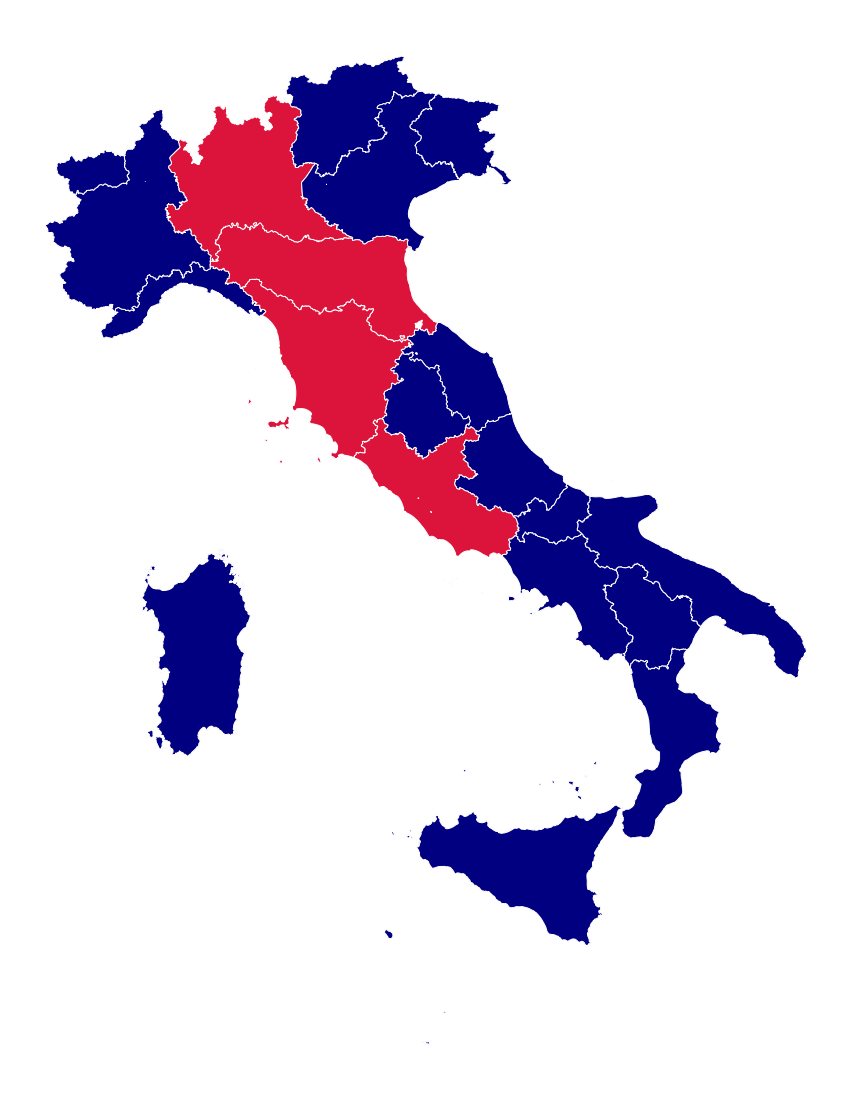

In [54]:
ax2 = gdf.plot(ax = cities.plot(
    figsize=(30, 20), markersize = 10, color = CityColor, marker = 'o'),
    edgecolor="white",
    linewidth=1,
    figsize=(30, 20),
    color=gdf['color'],
    alpha= 1,
    missing_kwds={'color': NonCrossedRegionColor});


ax2.set_axis_off();
ax2.set_facecolor('black') 
plt.savefig("brown_grey_italy.eps", format='eps')
plt.savefig("brown_grey_italy.pdf", transparent=True)